In [1]:
# If not installed, run this cell. It is needed to read DBF files
#!pip install dbfread
#!pip show dbfread

In [87]:
import arcpy, pandas as pd
from arcpy import env
from arcpy.sa import *
from dbfread import DBF
import matplotlib.pyplot as plt
import calendar
import seaborn as sns

In [4]:
# Paths to input datasets
root_folder = r"Z:\PhD_Datasets&Analysis\Info_Inputs"
tc_ds = root_folder + "\\TerraClimate"
str_flows_folder = root_folder + "\\Streamflow_Stations\\_DataFrames"
str_flows_folder2 = r"D:\OneDrive - CGIAR\Documents\PhD_JLU Giessen\Papers\Paper1\Processing"
drain_areas_folder = root_folder + "\\Streamflow_Sts_Drainage_Areas"
bands_gee = ["pr", "pet", "ro"] # band names in gee
tc_vars = ["ppt", "pet", "q"] # variable names according to TerraClimate


# Set arcpy environment variables
env.overwriteOutput = True
arcpy.CheckOutExtension("spatial")
env.cellSize = "MINOF"

In [ ]:
# Limit the spatil processing extent
buffer_zoi = drain_areas_folder + "\\Calibration_Basins_Final_Generalized_Buffer.shp"
env.mask = buffer_zoi
env.extent = buffer_zoi

In [104]:
# Dataframe with streamflow datasets
#str_flows = pd.read_csv(str_flows_folder + "\\Joined_Sts_DFs.csv")
str_flows = pd.read_csv(str_flows_folder2 + "\\Joined_Sts_DFs.csv")
str_flows

,yr-mth,MISS_07374525,ULUA_23,AMZN_17050001,NILE_1662100,YNGZ_2181900,MUDA_A4261110,DABE_6742900,DABE_42055
0,1958-1,NaN,NaN,NaN,866.0,8770.0,NaN,5113.0,NaN
1,1958-2,NaN,NaN,NaN,777.0,9400.0,NaN,4995.0,NaN
2,1958-3,NaN,NaN,NaN,810.0,12000.0,NaN,8735.0,NaN
3,1958-4,NaN,NaN,NaN,925.0,22900.0,NaN,10573.0,NaN
4,1958-5,NaN,NaN,NaN,660.0,45600.0,NaN,11352.0,NaN
...,...,...,...,...,...,...,...,...,...
787,2023-8,7495.469295,NaN,NaN,NaN,NaN,449.813,NaN,NaN
788,2023-9,4442.913232,NaN,NaN,NaN,NaN,335.637,NaN,NaN
789,2023-10,NaN,NaN,NaN,NaN,NaN,199.097,NaN,NaN
790,2023-11,4935.626362,NaN,NaN,NaN,NaN,212.866,NaN,NaN


In [105]:
str_flows.describe()

,MISS_07374525,ULUA_23,AMZN_17050001,NILE_1662100,YNGZ_2181900,MUDA_A4261110,DABE_6742900,DABE_42055
count,165.000000,55.000000,619.000000,324.000000,372.000000,168.000000,540.000000,98.000000
mean,15696.542922,406.049550,175398.551346,2444.774691,27399.704301,145.209833,6540.690741,4639.331884
std,7092.439629,228.475883,51171.383183,2305.466313,14114.020258,161.001105,2367.355540,1530.317690
min,4442.913232,201.789667,61866.666667,582.000000,1110.000000,14.608000,0.000000,1982.258065
25%,9633.391213,251.799214,132490.537634,1007.750000,13975.000000,39.254750,4650.000000,3460.250000
50%,15288.265479,337.534194,175885.714286,1373.500000,26700.000000,60.457000,6190.000000,4314.500000
75%,20586.347478,501.108833,222190.322581,2659.500000,38625.000000,211.769500,8210.000000,5605.000000
max,32649.324130,1203.755667,271396.774194,11419.000000,66200.000000,790.222000,14520.000000,8844.838710


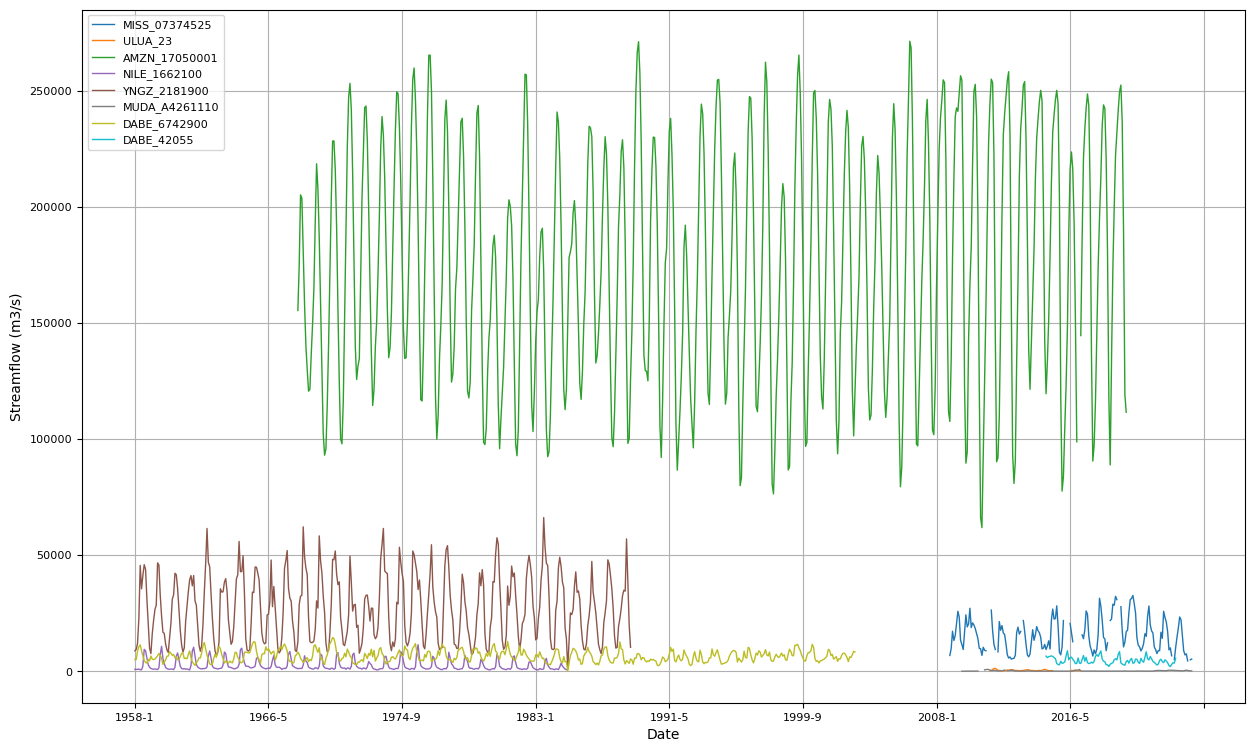

In [110]:
str_flows.plot(x="yr-mth", colormap='tab10', linewidth=1, fontsize=8, figsize=[15, 9])
plt.xlabel('Date', fontsize=10)
plt.ylabel('Streamflow (m3/s)', fontsize=10)
plt.legend(fontsize=8)
plt.grid(True)
plt.show()

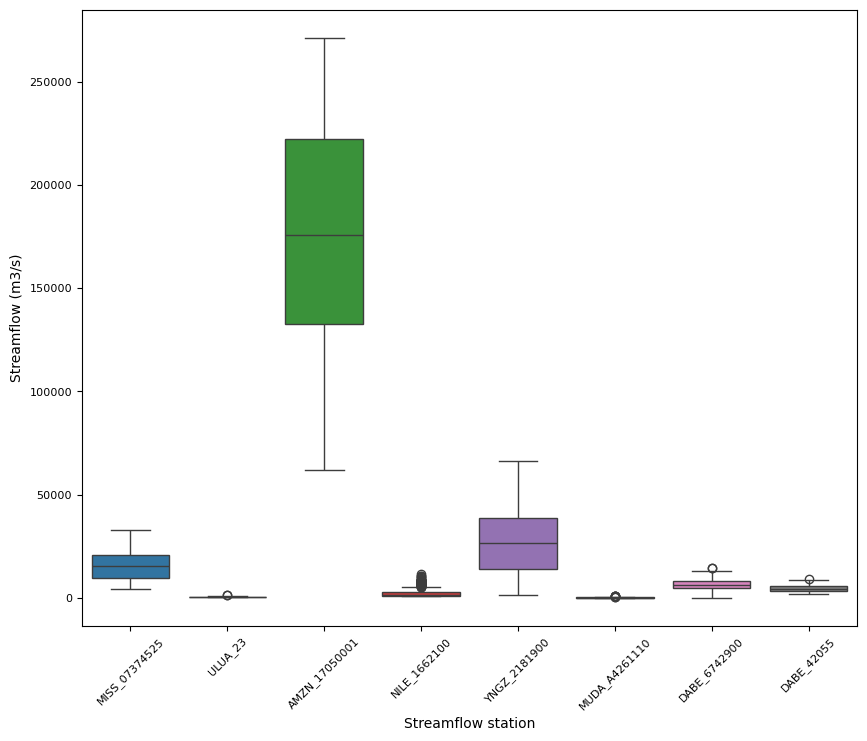

In [109]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=str_flows)
plt.xlabel('Streamflow station', fontsize=10)
plt.ylabel('Streamflow (m3/s)', fontsize=10)
plt.xticks(rotation=45, fontsize=8)
plt.yticks(fontsize=8)
plt.show()

In [111]:
str_flows["month"] = str_flows["yr-mth"].apply(lambda row: calendar.month_abbr[int(row.split("-")[1])])
str_flows["year"] = str_flows["yr-mth"].apply(lambda row: int(row.split("-")[0]))
str_flows

,yr-mth,MISS_07374525,ULUA_23,AMZN_17050001,NILE_1662100,YNGZ_2181900,MUDA_A4261110,DABE_6742900,DABE_42055,month,year
0,1958-1,NaN,NaN,NaN,866.0,8770.0,NaN,5113.0,NaN,Jan,1958
1,1958-2,NaN,NaN,NaN,777.0,9400.0,NaN,4995.0,NaN,Feb,1958
2,1958-3,NaN,NaN,NaN,810.0,12000.0,NaN,8735.0,NaN,Mar,1958
3,1958-4,NaN,NaN,NaN,925.0,22900.0,NaN,10573.0,NaN,Apr,1958
4,1958-5,NaN,NaN,NaN,660.0,45600.0,NaN,11352.0,NaN,May,1958
...,...,...,...,...,...,...,...,...,...,...,...
787,2023-8,7495.469295,NaN,NaN,NaN,NaN,449.813,NaN,NaN,Aug,2023
788,2023-9,4442.913232,NaN,NaN,NaN,NaN,335.637,NaN,NaN,Sep,2023
789,2023-10,NaN,NaN,NaN,NaN,NaN,199.097,NaN,NaN,Oct,2023
790,2023-11,4935.626362,NaN,NaN,NaN,NaN,212.866,NaN,NaN,Nov,2023


In [112]:
# Monthly values
str_flows_month = str_flows.drop(["year", "yr-mth"], axis=1).groupby(["month"], sort=False).mean()
str_flows_month

,MISS_07374525,ULUA_23,AMZN_17050001,NILE_1662100,YNGZ_2181900,MUDA_A4261110,DABE_6742900,DABE_42055
month,,,,,,,,
Jan,17160.009040,278.971783,141591.081594,1221.962963,9555.806452,140.966857,6249.066667,4875.120968
Feb,17795.722246,238.859430,165815.720081,1045.703704,10470.000000,137.875571,6391.888889,5862.010468
Mar,22268.368166,222.710403,191272.642680,845.111111,14781.935484,143.839429,7366.755556,6216.854839
Apr,23282.313538,217.008083,216693.717949,1125.407407,23245.161290,152.124286,8879.111111,5312.416667
May,20967.445039,272.687339,235180.645161,1116.888889,33603.225806,90.561615,9048.666667,5560.846774
Jun,18600.527479,380.389333,237578.910256,1005.333333,38958.064516,92.154071,8026.022222,5272.458333
Jul,15272.408045,436.601587,225448.697270,2004.814815,48100.000000,138.567071,6808.355556,3911.290323
Aug,11454.164450,559.170193,197358.250620,6705.592593,40712.903226,175.290067,5415.533333,3289.072581
Sep,8902.439013,762.536133,154419.057692,6897.074074,38696.774194,178.601500,4741.022222,3117.583333


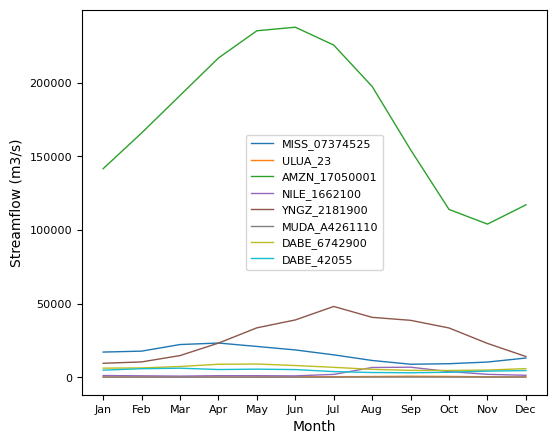

In [212]:
str_flows_month.plot(colormap='tab10', linewidth=1, fontsize=8, figsize=[6, 5])
plt.xticks(range(0, 12, 1), str_flows_month.index.to_list())
plt.xlabel('Month', fontsize=10)
plt.ylabel('Streamflow (m3/s)', fontsize=10)
plt.legend(fontsize=8)
#plt.grid(True)
plt.show()

In [204]:
str_flows_month["AMZN_17050001"].median()

178544.18138051833

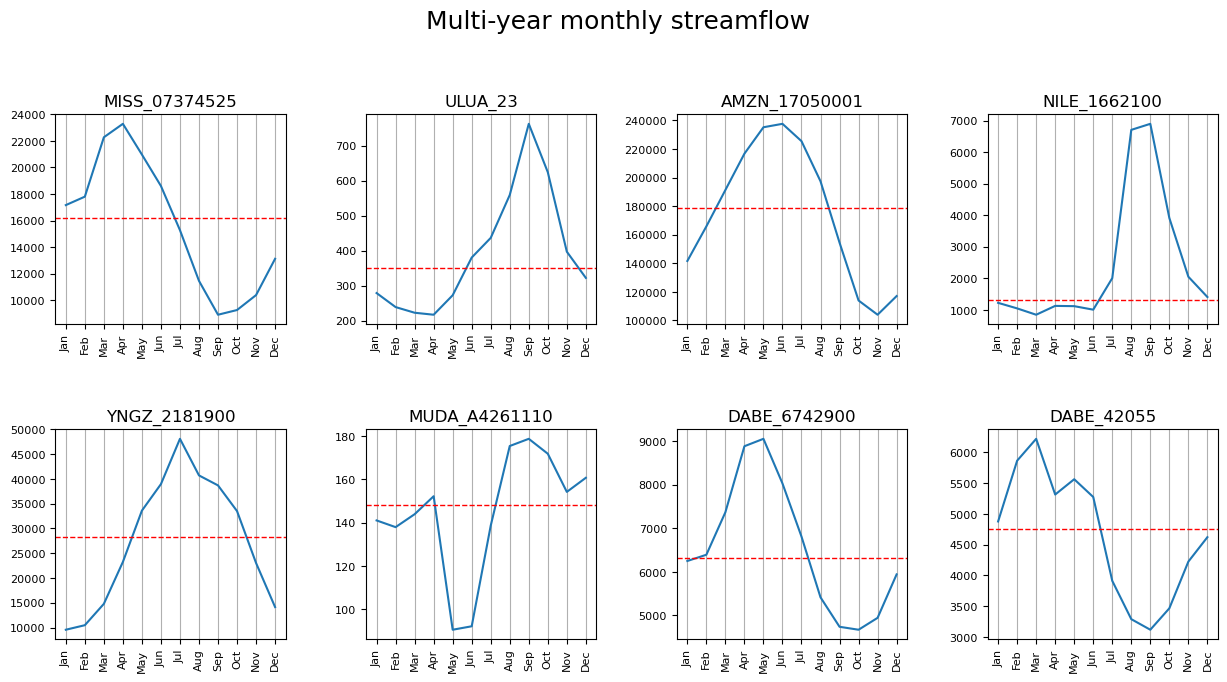

In [213]:
plt.figure(figsize=(15, 15))
plt.subplots_adjust(hspace=0.5, wspace=0.35)
plt.suptitle("Multi-year monthly streamflow", fontsize=18, y=0.95)

tickers = str_flows_month.columns.tolist()

# loop through the length of tickers and keep track of index
for n, ticker in enumerate(tickers):
    # add a new subplot iteratively
    ax = plt.subplot(4, 4, n + 1)

    # filter df and plot ticker on the new subplot axis
    str_flows_month[[ticker]].plot(ax=ax)
    median_value = str_flows_month[ticker].median()
    ax.axhline(median_value, color='red', linestyle='dashed', linewidth=1, label=f'Median: {median_value:.2f}')

    # chart formatting
    ax.set_title(ticker.upper())
    ax.get_legend().remove()
    ax.set_xticks(range(0, 12, 1), str_flows_month.index.to_list(), rotation=90)
    ax.tick_params(axis="both", labelsize=8)
    ax.grid(True, axis="x")
    ax.set_xlabel("")

In [114]:
# Yearly values
str_flows_year = str_flows.drop(["month", "yr-mth"], axis=1).groupby(["year"], sort=False).mean()
str_flows_year

,MISS_07374525,ULUA_23,AMZN_17050001,NILE_1662100,YNGZ_2181900,MUDA_A4261110,DABE_6742900,DABE_42055
year,,,,,,,,
1958,NaN,NaN,NaN,2930.166667,27230.833333,NaN,6467.666667,NaN
1959,NaN,NaN,NaN,2954.416667,24500.000000,NaN,5516.083333,NaN
1960,NaN,NaN,NaN,2482.833333,24215.833333,NaN,6601.916667,NaN
1961,NaN,NaN,NaN,3166.500000,28201.666667,NaN,5335.000000,NaN
1962,NaN,NaN,NaN,2800.000000,29700.833333,NaN,6569.166667,NaN
...,...,...,...,...,...,...,...,...
2019,22341.142462,NaN,202465.525066,NaN,NaN,49.568750,NaN,4612.550947
2020,20056.114526,NaN,NaN,NaN,NaN,58.693583,NaN,4360.649333
2021,15153.288511,NaN,NaN,NaN,NaN,130.340750,NaN,4826.040835


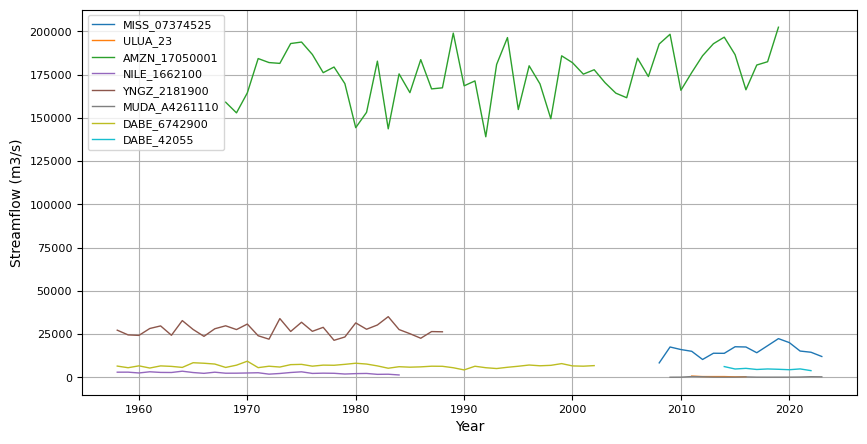

In [211]:
str_flows_year.plot(colormap='tab10', linewidth=1, fontsize=8, figsize=[10, 5])
plt.xlabel('Year', fontsize=10)
plt.ylabel('Streamflow (m3/s)', fontsize=10)
plt.legend(fontsize=8)
plt.grid(True)
plt.show()

In [6]:
# Read the DBF file
drain_areas_tb = DBF(drain_areas_folder + "\\Calibration_Basins_Final_Generalized.dbf")

# Convert to DataFrame
drain_areas_df = pd.DataFrame(iter(drain_areas_tb)).sort_values(by='gridcode')
drain_areas_df

,gridcode,Area_km2,Length_km,ID,STATION,SUFIX,BASIN,LAT,LONG,CONTINENT
2,0,3243820,14815,07374525,USGS 07374525 Mississippi River at Belle Chass...,MISS,Mississippi,29.857145,-89.977850,na
3,1,20234,841,23,Santiago,ULUA,Ulua,15.297001,-87.928217,na
4,2,4671618,15275,17050001,Obidos,AMZN,Amazon,-1.947222,-55.511108,sa
5,3,2606299,12473,1662100,Dongola,NILE,Nile,19.186000,30.489500,af
6,4,1693268,11832,2181900,Datong,YNGZ,Yangtze,30.770000,117.620000,as
7,5,975286,6523,A4261110,River Murray downstream Morgan (AMTD 316.5km),MUDA,Murray-Darling,-34.055059,139.685774,au
0,6,788358,6820,6742900,Ceatal Izmail,DABE,Danube,45.216667,28.716657,eu
1,7,520313,5911,42055,Smederevo,DABE,Danube,44.666780,20.920600,eu


In [7]:
drain_areas_df["SUFIX_ID"] = drain_areas_df["SUFIX"] + "_" + drain_areas_df["ID"]
drain_areas_df

,gridcode,Area_km2,Length_km,ID,STATION,SUFIX,BASIN,LAT,LONG,CONTINENT,SUFIX_ID
2,0,3243820,14815,07374525,USGS 07374525 Mississippi River at Belle Chass...,MISS,Mississippi,29.857145,-89.977850,na,MISS_07374525
3,1,20234,841,23,Santiago,ULUA,Ulua,15.297001,-87.928217,na,ULUA_23
4,2,4671618,15275,17050001,Obidos,AMZN,Amazon,-1.947222,-55.511108,sa,AMZN_17050001
5,3,2606299,12473,1662100,Dongola,NILE,Nile,19.186000,30.489500,af,NILE_1662100
6,4,1693268,11832,2181900,Datong,YNGZ,Yangtze,30.770000,117.620000,as,YNGZ_2181900
7,5,975286,6523,A4261110,River Murray downstream Morgan (AMTD 316.5km),MUDA,Murray-Darling,-34.055059,139.685774,au,MUDA_A4261110
0,6,788358,6820,6742900,Ceatal Izmail,DABE,Danube,45.216667,28.716657,eu,DABE_6742900
1,7,520313,5911,42055,Smederevo,DABE,Danube,44.666780,20.920600,eu,DABE_42055


In [8]:
# Creating dictionary with ids of the basins
id_dict = dict(zip(drain_areas_df['gridcode'], drain_areas_df['SUFIX_ID']))
id_dict

{0: 'MISS_07374525',
 1: 'ULUA_23',
 2: 'AMZN_17050001',
 3: 'NILE_1662100',
 4: 'YNGZ_2181900',
 5: 'MUDA_A4261110',
 6: 'DABE_6742900',
 7: 'DABE_42055'}

In [9]:
whc = Float(Raster("Z:\PhD_Datasets&Analysis\Inputs\WHC_FC33_Final.tif")) / 1000 # As the raster was originally multiplied by 1000
drain_areas_lyr = arcpy.MakeFeatureLayer_management(drain_areas_folder + "\\Calibration_Basins_Final_Generalized.shp")
drain_areas_ids = Raster(drain_areas_folder + "\\calib_ba_fin_gen.tif")

In [10]:
######################################################
### Starting values for the water balance model - T&M
######################################################

# Initial variables
warmup_yrs = 5
years = range(1958, 2023 + 1) # Years with available weather information to run the water balance
months = range(1, 12 + 1)
ini_yr_wp = years[0] + warmup_yrs

# Base flow of the previous month (mm)
bflow_ant = 10

In [11]:
# The recession constant (k) will be determined from hydrographs derived from the gathered streamflow datasets. For the rest of the world, k will be defined as 0.5
k_dict = {
    'MISS_07374525': 0.5,
    'ULUA_23': 0.5,
    'AMZN_17050001': 0.5,
    'NILE_1662100': 0.5,
    'YNGZ_2181900': 0.5,
    'MUDA_A4261110': 0.5,
    'DABE_6742900': 0.5,
    'DABE_42055': 0.5
}

In [12]:
# Initial soil water storage expressed as a fraction of water holding capacity [0-1]
ffcb_dict = {
    'MISS_07374525': 0.1,
    'ULUA_23': 0.1,
    'AMZN_17050001': 0.1,
    'NILE_1662100': 0.1,
    'YNGZ_2181900': 0.1,
    'MUDA_A4261110': 0.1,
    'DABE_6742900': 0.1,
    'DABE_42055': 0.1
}

In [ ]:
st0 = Con(drain_areas_ids == 0, whc*ffcb_dict[id_dict[0]],
          Con(drain_areas_ids == 1, whc*ffcb_dict[id_dict[1]], 
              Con(drain_areas_ids == 2, whc*ffcb_dict[id_dict[2]], 
                  Con(drain_areas_ids == 3, whc*ffcb_dict[id_dict[3]],
                      Con(drain_areas_ids == 4, whc*ffcb_dict[id_dict[4]],
                          Con(drain_areas_ids == 5, whc*ffcb_dict[id_dict[5]], 
                              Con(drain_areas_ids == 6, whc*ffcb_dict[id_dict[6]], whc*ffcb_dict[id_dict[7]])))))))

In [37]:
print('\n############################################################')
print('\t\tINITIAL VARIABLES')
print('\tPeriod to be executed: ' + str(years[0]) + '-' + str(years[-1]))
print('############################################################')

years = [1980]
months = [1]

for year in years:

    print("\n**Executing THORNTHWAITE AND MATHER model for " + str(year) + "**")

    ppt_nc_file = tc_ds + "\\TerraClimate_ppt_" + str(year) + ".nc"
    pet_nc_file  = tc_ds + "\\TerraClimate_pet_" + str(year) + ".nc"
    q_nc_file = tc_ds + "\\TerraClimate_q_" + str(year) + ".nc"

    nc_FP = arcpy.NetCDFFileProperties(ppt_nc_file)

    for month in months:

        print("\n\t*Executing water balance for month " + str(month) + "*\n")

        print("\tLoading precipitation, potential evapo, and runoff rasters from TerraClimate NetCDF files.....")

        # dimension_value = nc_FP.getDimensionValue("time", month-1)

        # ppt_name = "ppt_" + str(year) + "_" + str(month)
        # pet_name = "pet_" + str(year) + "_" + str(month)
        # q_name = "q_" + str(year) + "_" + str(month)

        # arcpy.MakeNetCDFRasterLayer_md(ppt_nc_file, "ppt", "lon", "lat", ppt_name, "", [["time", dimension_value]], "BY_VALUE")
        # arcpy.MakeNetCDFRasterLayer_md(pet_nc_file, "pet", "lon", "lat", pet_name, "", [["time", dimension_value]], "BY_VALUE")
        # arcpy.MakeNetCDFRasterLayer_md(q_nc_file, "q", "lon", "lat", q_name, "", [["time", dimension_value]], "BY_VALUE")

        # ppt_raster = arcpy.Raster(ppt_name)
        # pet_raster = arcpy.Raster(pet_name) * 0.1  # Scale factor: 0.1
        # q_raster = arcpy.Raster(q_name)

        print("\tPrecipitation, potential evapo., and runoff are loaded")

        print("\tCalculating effective precipitation......")
        eprec = ppt_raster - q_raster


############################################################
		INITIAL VARIABLES
	Period to be executed: 1980-1980
############################################################

**Executing THORNTHWAITE AND MATHER model for 1980**

	*Executing water balance for month 1*

	Loading precipitation, potential evapo, and runoff rasters from NetCDF files.....
	Precipitation, potential evapo., and runoff are loaded
	Calculating effective precipitation......
